In [1]:
import pandas as pd
import os
import glob
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import numpy as np
import matplotlib as mpl

## Compare different runs

In [2]:
# Some V8 jobs failed (some due to memory, now increased, mostly because the structure files were not there. Made sure they have been copied properly now.)

RESULT_GLOB_V7 = "/hps/nobackup/agb/research/francesco/tmp/jessAFDB_v7/results/*/jess_out.csv"
#RESULT_GLOB_V8 = "/hps/nobackup/agb/research/francesco/tmp/jessAFDB_v8/results/*/jess_out.csv"

columns = ("struct_file", "protein_name", "probability", "chain", "r1_bond", 
            "r_cat", "r2_bond", "r1_bond_name", "r_cat_name", "r2_bond_name", 
            "bond_type", "rmsd", "r_asa", "template")

df_v7 = pd.DataFrame(columns=columns)

for file in glob.glob(RESULT_GLOB_V7):
    tmp_df = pd.read_csv(file, names=columns)
    tmp_df = tmp_df.sort_values("rmsd").drop_duplicates(["protein_name", "r1_bond", "r_cat", "r2_bond"], keep="first")
    df_v7 = pd.concat([df_v7, tmp_df])

#df_v8 = pd.DataFrame(columns=columns)

#for file in glob.glob(RESULT_GLOB_V8):
#    tmp_df = pd.read_csv(file, names=columns)
#    tmp_df = tmp_df.sort_values("rmsd").drop_duplicates(["protein_name", "r1_bond", "r_cat", "r2_bond"], keep="first")
#    df_v8 = pd.concat([df_v8, tmp_df])

df_v8 = pd.read_csv("tmp/afdb_scan_v3.csv")

/tmp/ipykernel_2120376/792979459.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_v7 = pd.concat([df_v7, tmp_df])


In [3]:
df_v7 = df_v7.sort_values("rmsd").drop_duplicates(["protein_name", "r1_bond", "r_cat", "r2_bond"], keep="first")

<Axes: xlabel='rmsd', ylabel='Count'>

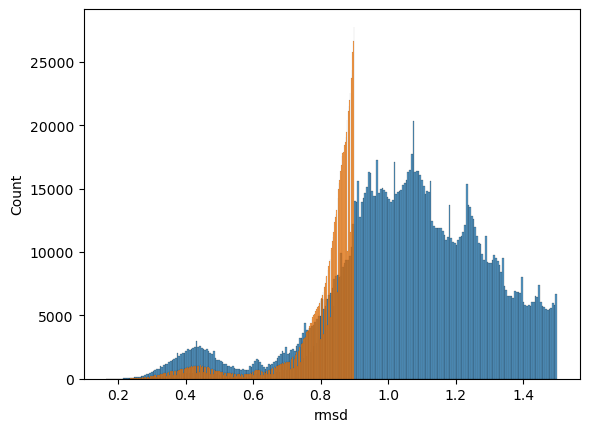

In [4]:
sns.histplot(df_v7, x="rmsd")
sns.histplot(df_v8[df_v8["rmsd"]<1.5], x="rmsd")


In [6]:
df_v7

,struct_file,protein_name,probability,chain,r1_bond,r_cat,r2_bond,r1_bond_name,r_cat_name,r2_bond_name,bond_type,rmsd,r_asa,template
0,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A7L4PJH8,0.973,A,460,498,551,LYS,ASP,ASN,CnaA-like,0.165,0.018,2wza_A_1082_1132_1232
0,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A316KE32,0.971,A,181,221,292,LYS,ASP,ASN,CnaA-like,0.177,0.006,8beg_A_590_636_729
0,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A828VLF3,0.968,A,730,776,861,LYS,ASP,ASN,CnaA-like,0.182,0.026,2wza_A_1259_1307_1393
0,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A0D8ZP10,0.968,A,423,465,542,LYS,ASP,ASN,CnaA-like,0.187,0.022,2wza_A_1082_1132_1232
0,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A6G9NEE2,0.967,A,36,72,125,LYS,ASP,ASN,CnaA-like,0.188,0.036,2wza_A_1082_1132_1232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1806,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A222SS35,0.001,A,146,143,170,LYS,ASP,ASN,CnaA-like,1.500,0.164,3opu_A_1334_1383_1469
1367,/hps/nobackup/agb/research/francesco/tmp/jessA...,A8MAW8,0.001,A,97,203,75,LYS,ASP,ASN,CnaA-like,1.500,0.313,2wza_A_1259_1307_1393
1320,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A0E0GIE3,0.001,A,407,359,352,LYS,GLU,ASN,CnaB-like,1.500,0.093,2x9y_A_453_577_623
1745,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A0B0HIE3,0.001,A,150,66,70,LYS,GLU,ASP,CnaB-like,1.500,0.202,2x5p_A_31_77_117


In [7]:
df_v8

,struct_file,protein_name,probability,chain,r1_bond,r_cat,r2_bond,r1_bond_name,r_cat_name,r2_bond_name,bond_type,rmsd,r_asa,template
0,/hps/nobackup/agb/research/francesco/tmp/jessA...,M5AFT7,0.940,A,160,196,270,LYS,ASP,ASN,CnaA-like,0.276,0.014,2wza_A_1082_1132_1232
1,/hps/nobackup/agb/research/francesco/tmp/jessA...,M5AY60,0.922,A,174,204,284,LYS,ASP,ASN,CnaA-like,0.308,0.037,4tsh_B_1161_1211_1311
2,/hps/nobackup/agb/research/francesco/tmp/jessA...,M5ACM3,0.909,A,213,249,321,LYS,ASP,ASN,CnaA-like,0.334,0.023,2wza_A_1082_1132_1232
3,/hps/nobackup/agb/research/francesco/tmp/jessA...,F9LZQ0,0.889,A,78,139,162,LYS,GLU,ASN,CnaB-like,0.354,0.061,6bbt_A_15_101_152
4,/hps/nobackup/agb/research/francesco/tmp/jessA...,F9LZQ0,0.823,A,361,423,441,LYS,GLU,ASN,CnaB-like,0.435,0.027,3gle_A_179_258_303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031497,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A2V1IWJ4,0.127,A,462,418,475,LYS,GLU,ASP,CnaB-like,0.899,0.028,2x5p_A_31_77_117
1031498,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A4R4BT75,0.123,A,333,341,317,LYS,GLU,ASN,CnaB-like,0.899,0.051,2x9x_A_349_405_428
1031499,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A5N6FUC8,0.077,A,378,375,349,LYS,GLU,ASN,CnaB-like,0.899,0.337,2y1v_A_41_143_184
1031500,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A7X7NZ92,0.122,A,221,267,265,LYS,GLU,ASN,CnaA-like,0.899,0.053,2x9w_A_453_577_623


## Basic analysis

In [31]:
df = pd.read_csv("output/20250113_adfb_scan.csv")

<Axes: xlabel='rmsd', ylabel='Count'>

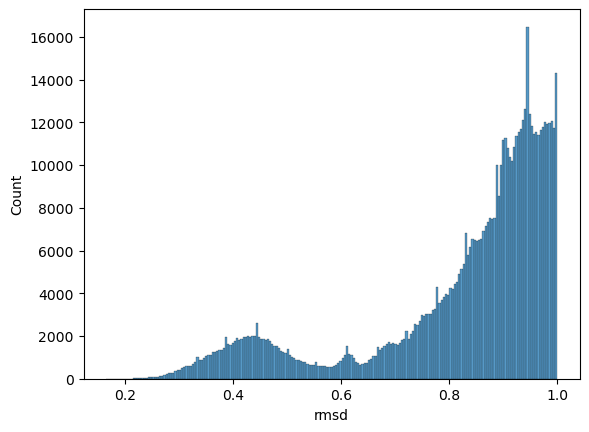

In [32]:
sns.histplot(data=df, x="rmsd")

(0.0, 1000.0)

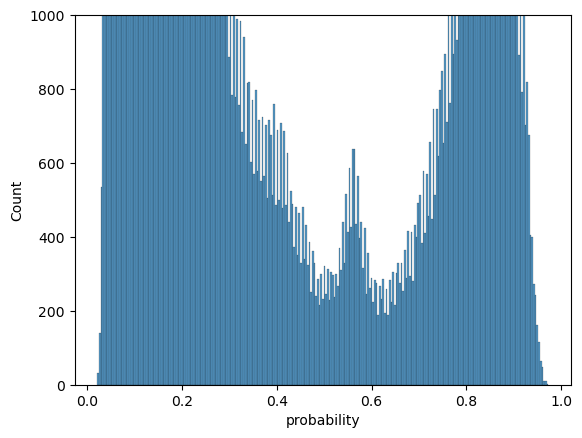

In [33]:
sns.histplot(data=df, x="probability")
plt.ylim([0,1000])

/tmp/ipykernel_424698/2958427706.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  plot_df = df[(df["probability"]>.65)&(~df["taxonomy"].isna())].fillna("Not annotated").value_counts(["pfamA_id"]).reset_index()\


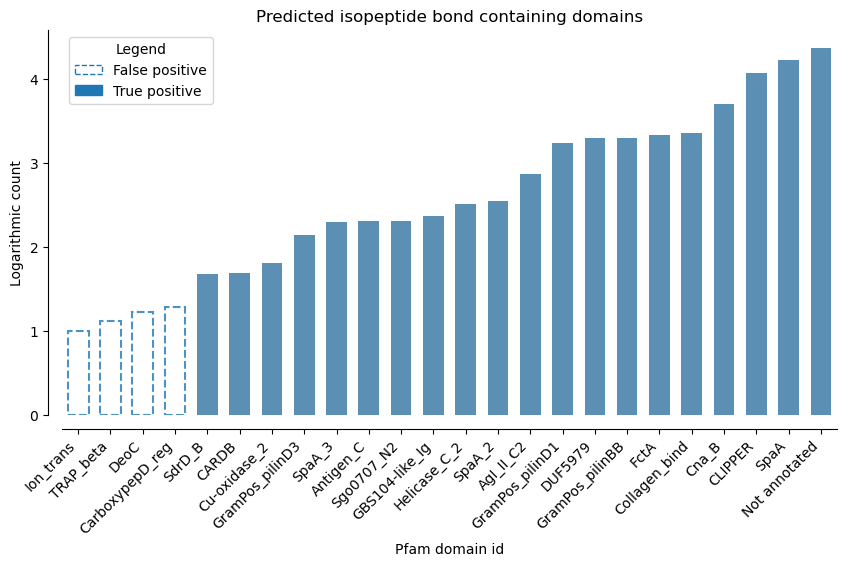

In [82]:
fig, ax = plt.subplots(figsize=[10,5])

non_isopep = ["Cu-oxidase_2 ", "DeoC", "TRAP_beta", "Ion_trans", "CarboxypepD_reg"]

plot_df = df[(df["probability"]>.65)&(~df["taxonomy"].isna())].fillna("Not annotated").value_counts(["pfamA_id"]).reset_index()\
                    .query('count>=10').sort_values("count")
plot_df["Pfam domain id"] = plot_df["pfamA_id"].replace({"DUF11":"CLIPPER", "DUF7507":"CLIPPER_2"})
plot_df["Log count"] = plot_df["count"].apply(np.log10)

g=sns.barplot(data=plot_df, x="Pfam domain id", y="Log count",
             color="C0", alpha=.8,
             dodge=True, ax=ax, legend=False, gap=.2, ls="-", lw=1.5)

fills = [False if domain in non_isopep else True for domain in plot_df["pfamA_id"].unique()]
for bar, fill in zip(ax.containers[0], fills):
    if not fill:
        bar.set_linestyle("--")
        bar.set_color("C0")
        bar.set_alpha(.8)
        bar.set_fill(fill)

sns.despine(ax=ax, offset=10)
ax.set_ylabel("Logarithmic count")
ax.set_xlabel("")
ax.set_title("Predicted isopeptide bond containing domains")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel("Pfam domain id")

false_positive_patch = mpatches.Patch(facecolor='none', edgecolor='C0', linestyle='--', label='False positive')
true_positive_patch = mpatches.Patch(facecolor='C0', edgecolor='C0', linestyle='-', label='True positive')
ax.legend(handles=[false_positive_patch, true_positive_patch], title='Legend')

plt.savefig("tmp/6.png", dpi=400, bbox_inches="tight")

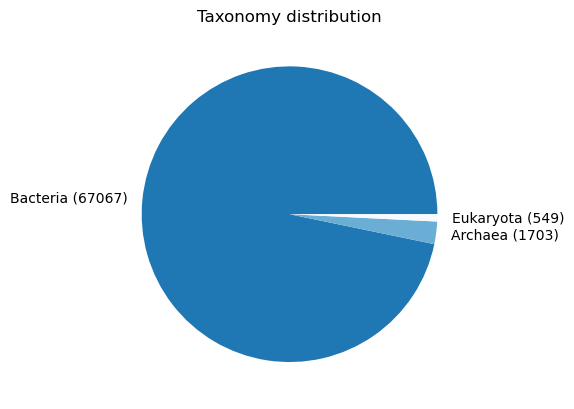

In [87]:
fig, ax = plt.subplots()

ax.axis("off")
plot_df = df[(df["kingdom"].isin(["Bacteria", "Archaea", "Eukaryota"]))\
          & (df["probability"]>0.65)]
plot_df = pd.DataFrame(plot_df.value_counts("kingdom")).reset_index()
plot_df["kingdom"] = plot_df["kingdom"] + " (" + plot_df["count"].astype(str) + ")"
count_dict = dict(zip(plot_df["kingdom"], plot_df["count"]))

labels = count_dict.keys()
sizes = list(count_dict.values())

cmap = mpl.colormaps['Blues']
ax.pie(sizes, labels=labels, colors=["C0", cmap(0.5), cmap(1)])
ax.set_title("Taxonomy distribution")

plt.savefig("tmp/7.png", dpi=400, bbox_inches="tight")

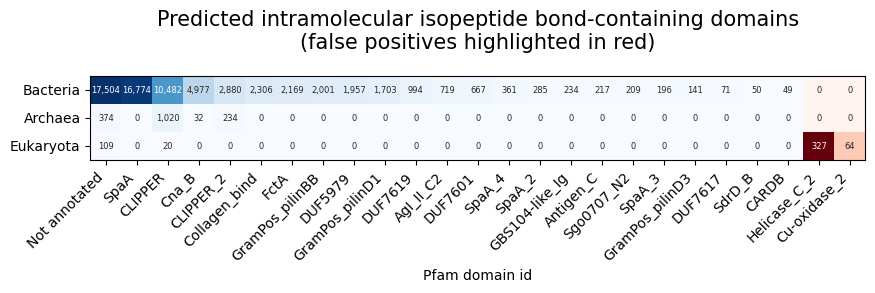

In [35]:
# Plot now 

plot_df = df[(df["probability"]>.65)&(~df["taxonomy"].isna())].copy()
plot_df["pfamA_id"] = plot_df["pfamA_id"].fillna("Not annotated")
plot_df["pfamA_id"] = plot_df["pfamA_id"].replace({"DUF11":"CLIPPER", "DUF7507":"CLIPPER_2"})
plot_df = plot_df.value_counts(["kingdom", "pfamA_id"]).reset_index()\
                 .query('count>=20&kingdom!="unclassified sequences"')\
                 .pivot(index="pfamA_id", columns="kingdom", values="count").fillna(0).astype(int)\
                 [["Bacteria", "Archaea", "Eukaryota"]]\
                 .sort_values(["Bacteria", "Archaea", "Eukaryota"], ascending=[False, False, False]).T\
                 .fillna(0)

false_positive_ids = ["Cu-oxidase_2", "DeoC", "TRAP_beta", "Ion_trans", "CarboxypepD_reg", "Helicase_C_2"]

# Create masks for false positives and non-false positives (columns-based)
false_positive_mask = plot_df.columns.isin(false_positive_ids)

# Separate data into two layers: false positives and non-false positives
false_positives_layer = plot_df.astype(float).copy()
false_positives_layer.loc[:, ~false_positive_mask] = np.nan  # Keep only false positives

non_false_positives_layer = plot_df.astype(float).copy()
non_false_positives_layer.loc[:, false_positive_mask] = np.nan  # Exclude false positives

# Create colormaps with custom "under" or "over" values
cmap_false_positives = plt.get_cmap("Reds").copy()
cmap_false_positives.set_under("none")  # Make non-values invisible

cmap_non_false_positives = plt.get_cmap("Blues").copy()
cmap_non_false_positives.set_under("none")  # Make non-values invisible

fig, ax = plt.subplots(figsize=[10,5])

sns.heatmap(non_false_positives_layer, cmap=cmap_non_false_positives, 
            ax=ax, annot=True, annot_kws={'fontsize': 6}, fmt=",.0f", cbar=False)

sns.heatmap(false_positives_layer, cmap=cmap_false_positives, 
            ax=ax, annot=True, annot_kws={'fontsize': 6}, fmt=",.0f", cbar=False)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_aspect(0.9)
ax.set_title("Predicted intramolecular isopeptide bond-containing domains\n(false positives highlighted in red)", fontsize=15, pad=20)
ax.set_ylabel("")
ax.set_xlabel("Pfam domain id")

# Add countour lines
for _, spine in ax.spines.items():
    spine.set_visible(True)

plt.savefig("tmp/8.png", dpi=400, bbox_inches="tight")

In [39]:
df[(df["probability"]>.65)]

,struct_file,uniprot_acc,probability,chain,r1_bond,r_cat,r2_bond,r1_bond_name,r_cat_name,r2_bond_name,...,clan_id,seq_start,seq_end,taxonomy,species,kingdom,is_domain,r1_plddt,r2_plddt,r3_plddt
146,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A3S4UB56,0.886,A,57,143,181,LYS,GLU,ASN,...,Transthyretin,40.0,182.0,Bacteria; Actinomycetota; Actinomycetes; Mycob...,Corynebacterium segmentosum,Bacteria,True,94.56,94.56,90.44
147,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A1G6A1Z5,0.888,A,848,923,969,LYS,GLU,ASN,...,Transthyretin,844.0,949.0,Bacteria; Bacillota; Bacilli; Lactobacillales;...,Streptococcus henryi,Bacteria,True,93.00,92.06,93.62
148,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A7X9NKL5,0.888,A,460,531,568,LYS,GLU,ASN,...,Transthyretin,457.0,564.0,Bacteria; Bacillota; Bacilli; Lactobacillales;...,Enterococcus cecorum,Bacteria,True,97.19,98.06,96.88
151,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A1G6A2F2,0.890,A,396,453,523,LYS,GLU,ASN,...,Transthyretin,390.0,484.0,Bacteria; Bacillota; Bacilli; Lactobacillales;...,Streptococcus henryi,Bacteria,True,95.94,96.38,92.69
152,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A366SL42,0.890,A,41,144,188,LYS,GLU,ASN,...,Transthyretin,32.0,189.0,Bacteria; Bacillota; Bacilli; Lactobacillales;...,Enterococcus cecorum,Bacteria,True,95.00,93.12,87.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640719,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A229UHZ6,0.783,A,689,732,791,LYS,ASP,ASN,...,NaN,NaN,NaN,Bacteria; Bacillota; Bacilli; Bacillales; Paen...,Paenibacillus rigui,Bacteria,False,93.69,93.88,92.00
640720,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A2G4WS51,0.837,A,211,251,340,LYS,ASP,ASN,...,NaN,NaN,NaN,Bacteria; Pseudomonadota; Gammaproteobacteria;...,Photobacterium leiognathi,Bacteria,False,93.88,94.88,92.12
640721,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A6V6YRE4,0.844,A,507,547,589,LYS,ASP,ASN,...,E-set,500.0,606.0,Bacteria; Bacteroidota; Flavobacteriia; Flavob...,Flavobacterium chungangense,Bacteria,True,95.38,96.19,95.75
640722,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A2G4WKU1,0.826,A,269,303,378,LYS,ASP,ASN,...,NaN,NaN,NaN,Bacteria; Pseudomonadota; Gammaproteobacteria;...,Photobacterium leiognathi,Bacteria,False,98.06,97.44,97.88


## Annotate with new HMMs

In [19]:
from pathlib import Path
import re 
import sys
sys.path.append("../../bin")
from pfamenv import PFAM_USER, PFAM_HOST, PFAM_PASSWORD, PFAM_PORT, PFAM_VERSION
from mysql import connector

# HMM domain annotation global variables
CACHE_HMM_DOMAIN = "tmp/cached_hmm_domains.csv"
HMMSCAN = "/hps/software/users/agb/research/francesco/software/hmmer-3.3.2/bin/hmmscan"
HMMPRESS = "/hps/software/users/agb/research/francesco/software/hmmer-3.3.2/bin/hmmpress"
CACHE_SEQS_FASTA = "tmp/cached_sequences.fa"
CACHE_SEQS_TABLE = "tmp/cached_sequences.csv"
TMP_HMM_DIR = "tmp/HMMs"
HMMSCAN_OUTPUT = "tmp/hmscan.out"
CACHE_HMM_TABLE = "tmp/cached_hmm.csv"
DOMAINS = ["PF24346", "PF24514", "PF24517", "PF24547", "PF24558", "PF24593", "PF24595"]

In [20]:
def hmm_parse(domain_data:dict) -> pd.DataFrame:
    """

    """

    # Parse results
    # NOTE: This code avoids overwriting existing domains
    pf_df = pd.read_csv(HMMSCAN_OUTPUT, comment='#', 
                          names=["target name", "accession1", "tlen", "query name", "accession2", "qlen", "E-value", "full_seq_score", "full_seq_bias",
                                 "#", "of", "c-Evalue", "i-Evalue", "domain_score", "bias", "hmm_from",
                                 "hmm_to", "ali_from", "ali_to", "from", "to", "acc", "description of target"], sep=r'\s+')
    
    # consider a domain specific GA
    p_df = pd.DataFrame()
    for pfamA_acc in domain_data:
        p_df = pd.concat([p_df, 
                          pf_df[(pf_df["full_seq_score"]>domain_data[pfamA_acc]["sequence_threshold"]) &\
                     (pf_df["domain_score"]>domain_data[pfamA_acc]["domain_threshold"]) &\
                     (pf_df["target name"] == pfamA_acc)]\
              [["target name", "query name", "from", "to"]]\
                   .rename(columns={"target name": "pfamA_acc", "query name": "uniprot_acc", "from":"seq_start", "to":"seq_end"})\
                    .assign(pfamA_id=domain_data[pfamA_acc]["pfamA_id"])]
        )
    
    return p_df

def mock_download_hmm() -> dict:
    """
    
        Download HMM files
    
    """
    # Download HMMs and concat
    domain_data = {}
    for domain in DOMAINS:
        
        Path(os.path.join(TMP_HMM_DIR, "HMM")).touch()
        # Download if not already existing
        if not os.path.exists(os.path.join(TMP_HMM_DIR, domain)):
            cmd = f"cd {TMP_HMM_DIR}; pfco {domain}"
            r = subprocess.run(cmd, shell=True, text=True, capture_output=True)
            if r.returncode != 0:
                print("Error encountered")
                print(r.stderr)
                sys.exit()
        
        # Get gathering thresholds
        ga = re.compile(r"GA.+(\d+\d+.\d+\d+).+(\d+\d+.\d+\d+);")
        ac = re.compile(r"ID   (.+)")
        cl = re.compile(r"CL   (CL\d+)")
        clan_acc = np.NaN
        with open(os.path.join(TMP_HMM_DIR, domain, "DESC"), "rt") as desc:
            for line in desc:
                if line.startswith("ID"):
                    pfamA_id = ac.findall(line)[0]
                if line.startswith("GA"):
                    thresholds = ga.findall(line)
                if line.startswith("CL"):
                    #print(line, cl.findall(line))
                    clan_acc = cl.findall(line)[0]

        d_thr, s_thr = float(thresholds[0][0]), float(thresholds[0][1])
        domain_data[domain] = {"pfamA_id": pfamA_id, "domain_threshold": d_thr, 
                                        "sequence_threshold": s_thr, "clan_acc": clan_acc}
        
    return domain_data
    
def clanacc_to_id(clan_accs:list) -> pd.DataFrame:
    """

        From clan_acc to clan_id
    
    """
    cnx = connector.connect(user=PFAM_USER,
                            password=PFAM_PASSWORD,
                            port=PFAM_PORT,
                            host=PFAM_HOST)
    cursor = cnx.cursor()
    clan_accs = ",".join([f"'{u}'" for u in clan_accs])
    cursor.execute(f"SELECT clan_acc, clan_id \
                     FROM {PFAM_VERSION}.clan \
                     WHERE  clan_acc IN ({clan_accs})")

    output = cursor.fetchall()

    return(
        pd.DataFrame(output, columns=["clan_acc", "clan_id"])
          )

def is_domain(row):
    """

        Assign if at least 2/3 residues are in domain
    
    """
    residues = [row["r1_bond"], row["r_cat"], row["r2_bond"]]
    status = False
    c = 0
    for res in residues:
        if res >= row["seq_start"] and res <= row["seq_end"]:
            c += 1
            #status = True
            #break
    if c >= 2:
        status = True
    return status

In [21]:
df = pd.read_csv("tmp/cached_hmm.csv")

df.loc[df["is_domain"]==False, "pfamA_acc"] = np.NaN
df.loc[df["is_domain"]==False, "pfamA_id"] = np.NaN
df.loc[df["is_domain"]==False, "clan_id"] = np.NaN
df.loc[df["is_domain"]==False, "clan_acc"] = np.NaN
df.loc[df["is_domain"]==False, "seq_start"] = np.NaN
df.loc[df["is_domain"]==False, "seq_end"] = np.NaN

In [22]:
domain_data = mock_download_hmm()

In [23]:
p_df = hmm_parse(domain_data)

In [24]:
clan_data = {pfamA_acc:domain_data[pfamA_acc]["clan_acc"] for pfamA_acc in domain_data}
p_df["clan_acc"] = p_df["pfamA_acc"].map(clan_data)
clan_accs = p_df["clan_acc"].unique()
clan_df = clanacc_to_id(clan_accs)
# Now add clan_id
p_df = pd.merge(p_df, clan_df, on="clan_acc", how="outer")

In [25]:
# Put in table
t_df = pd.merge(df[df["is_domain"]==False].reset_index()[[col for col in df.columns if col not in p_df]+["uniprot_acc", "index"]],
                p_df, on="uniprot_acc").set_index("index")
t_df.index.name = None

In [26]:
# Assign domain
t_df["is_domain"] = t_df.apply(is_domain, axis=1)
t_df = t_df.sort_values("is_domain", ascending=False)\
            .drop_duplicates(["uniprot_acc", "r1_bond", "r_cat", "r2_bond"], keep="first")

In [27]:
df.loc[t_df.index] = t_df
df.loc[df["is_domain"]==False, "pfamA_acc"] = np.NaN
df.loc[df["is_domain"]==False, "pfamA_id"] = np.NaN
df.loc[df["is_domain"]==False, "clan_id"] = np.NaN
df.loc[df["is_domain"]==False, "clan_acc"] = np.NaN
df.loc[df["is_domain"]==False, "seq_start"] = np.NaN
df.loc[df["is_domain"]==False, "seq_end"] = np.NaN

In [28]:
df[(df["pfamA_acc"].isin(DOMAINS))&(df["probability"]>.65)&(~df["taxonomy"].isna())].value_counts("pfamA_id")

pfamA_id
DUF7507    3148
DUF7619    1000
DUF7601     668
SpaA_4      377
DUF7617      73
DUF7604       6
Name: count, dtype: int64

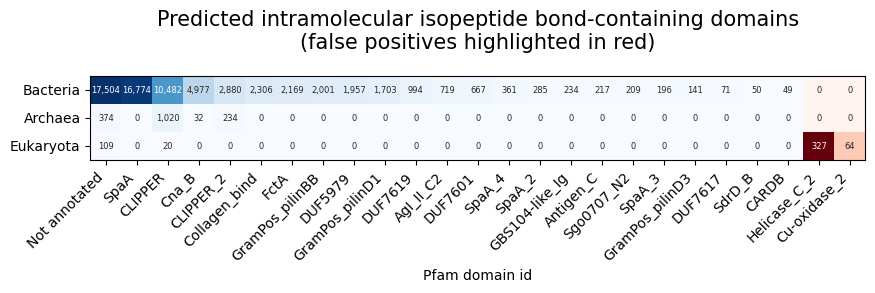

In [30]:
# Plot now 

plot_df = df[(df["probability"]>.65)&(~df["taxonomy"].isna())].copy()
plot_df["pfamA_id"] = plot_df["pfamA_id"].fillna("Not annotated")
plot_df["pfamA_id"] = plot_df["pfamA_id"].replace({"DUF11":"CLIPPER", "DUF7507":"CLIPPER_2"})
plot_df = plot_df.value_counts(["kingdom", "pfamA_id"]).reset_index()\
                 .query('count>=20&kingdom!="unclassified sequences"')\
                 .pivot(index="pfamA_id", columns="kingdom", values="count").fillna(0).astype(int)\
                 [["Bacteria", "Archaea", "Eukaryota"]]\
                 .sort_values(["Bacteria", "Archaea", "Eukaryota"], ascending=[False, False, False]).T\
                 .fillna(0)

false_positive_ids = ["Cu-oxidase_2", "DeoC", "TRAP_beta", "Ion_trans", "CarboxypepD_reg", "Helicase_C_2"]

# Create masks for false positives and non-false positives (columns-based)
false_positive_mask = plot_df.columns.isin(false_positive_ids)

# Separate data into two layers: false positives and non-false positives
false_positives_layer = plot_df.astype(float).copy()
false_positives_layer.loc[:, ~false_positive_mask] = np.nan  # Keep only false positives

non_false_positives_layer = plot_df.astype(float).copy()
non_false_positives_layer.loc[:, false_positive_mask] = np.nan  # Exclude false positives

# Create colormaps with custom "under" or "over" values
cmap_false_positives = plt.get_cmap("Reds").copy()
cmap_false_positives.set_under("none")  # Make non-values invisible

cmap_non_false_positives = plt.get_cmap("Blues").copy()
cmap_non_false_positives.set_under("none")  # Make non-values invisible

fig, ax = plt.subplots(figsize=[10,5])

sns.heatmap(non_false_positives_layer, cmap=cmap_non_false_positives, 
            ax=ax, annot=True, annot_kws={'fontsize': 6}, fmt=",.0f", cbar=False)

sns.heatmap(false_positives_layer, cmap=cmap_false_positives, 
            ax=ax, annot=True, annot_kws={'fontsize': 6}, fmt=",.0f", cbar=False)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.set_aspect(0.9)
ax.set_title("Predicted intramolecular isopeptide bond-containing domains\n(false positives highlighted in red)", fontsize=15, pad=20)
ax.set_ylabel("")
ax.set_xlabel("Pfam domain id")

# Add countour lines
for _, spine in ax.spines.items():
    spine.set_visible(True)

plt.savefig("tmp/8.png", dpi=400, bbox_inches="tight")



In [12]:
plddt_df = pd.read_csv("tmp/cached_plddt.csv")

In [13]:
test_df = pd.merge(df, plddt_df, how="left")
split = pd.DataFrame(test_df['plddt'].apply(eval).to_list(), columns = ["r1_plddt", "r2_plddt", "r3_plddt"])
test_df = pd.concat([test_df, split], axis=1)
del test_df["plddt"]

In [14]:
test_df[(test_df["pfamA_acc"].isin(DOMAINS))&(test_df["probability"]>.65)&(~df["taxonomy"].isna())].value_counts("pfamA_id")

pfamA_id
DUF7507    3684
DUF7619    1022
DUF7601     915
SpaA_4      567
DUF7604     164
DUF7617     116
CBM96        10
Name: count, dtype: int64

In [15]:
df = pd.read_csv("output/20250113_adfb_scan.csv", low_memory=False)

In [16]:
df[(df["pfamA_acc"].isin(DOMAINS))&(df["probability"]>.65)&(~df["taxonomy"].isna())].value_counts("pfamA_id")

pfamA_id
DUF7507    3148
DUF7619    1000
DUF7601     668
SpaA_4      377
DUF7617      73
DUF7604       6
Name: count, dtype: int64

In [17]:
df[df["pfamA_id"]=="CBM96"]

,struct_file,uniprot_acc,probability,chain,r1_bond,r_cat,r2_bond,r1_bond_name,r_cat_name,r2_bond_name,...,clan_id,seq_start,seq_end,taxonomy,species,kingdom,is_domain,r1_plddt,r2_plddt,r3_plddt
379540,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A525D8K1,0.059,A,633,675,732,LYS,GLU,ASN,...,Nucleoplasmin,599.0,764.0,Bacteria; Thermodesulfobacteriota; Desulfobact...,Desulfobacteraceae bacterium,Bacteria,True,67.12,60.59,60.47


In [18]:
test_df[test_df["pfamA_id"]=="CBM96"]

,struct_file,uniprot_acc,probability,chain,r1_bond,r_cat,r2_bond,r1_bond_name,r_cat_name,r2_bond_name,...,clan_id,seq_start,seq_end,taxonomy,species,kingdom,is_domain,r1_plddt,r2_plddt,r3_plddt
348303,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A0N1GKN2,0.079,A,339,479,341,LYS,GLU,ASN,...,Nucleoplasmin,760.0,922.0,Bacteria; Actinomycetota; Actinomycetes.,Actinobacteria bacterium OV450,Bacteria,False,88.44,92.00,83.75
350863,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A5B7WUJ6,0.054,A,304,348,342,LYS,GLU,ASN,...,Nucleoplasmin,46.0,197.0,Bacteria; Actinomycetota; Actinomycetes; Micro...,Glutamicibacter creatinolyticus,Bacteria,False,97.00,98.06,96.75
373649,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A7X7JYF2,0.881,A,469,499,559,LYS,ASP,ASN,...,Nucleoplasmin,294.0,449.0,Bacteria; Chloroflexota; Anaerolineae; Anaerol...,Anaerolineales bacterium,Bacteria,False,97.38,97.62,96.75
379540,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A525D8K1,0.059,A,633,675,732,LYS,GLU,ASN,...,Nucleoplasmin,599.0,764.0,Bacteria; Thermodesulfobacteriota; Desulfobact...,Desulfobacteraceae bacterium,Bacteria,True,67.12,60.59,60.47
382984,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A5R8UXP3,0.059,A,304,348,342,LYS,GLU,ASN,...,Nucleoplasmin,46.0,197.0,Bacteria; Actinomycetota; Actinomycetes; Micro...,Glutamicibacter sp. V16R2B1,Bacteria,False,96.88,98.06,96.81
390152,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A7Z9ZIM7,0.825,A,553,583,642,LYS,ASP,ASN,...,Nucleoplasmin,357.0,538.0,Bacteria; Chloroflexota; Anaerolineae.,Anaerolineae bacterium,Bacteria,False,95.88,97.81,96.62
390993,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A7V1JL74,0.774,A,489,519,578,LYS,ASP,ASN,...,Nucleoplasmin,295.0,478.0,Bacteria; Chloroflexota; Anaerolineae.,Anaerolineae bacterium,Bacteria,False,95.75,97.81,96.25
391179,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A7C7QP25,0.645,A,493,523,581,LYS,ASP,ASN,...,Nucleoplasmin,299.0,483.0,Bacteria; Chloroflexota; Anaerolineae.,Anaerolineae bacterium,Bacteria,False,97.50,98.19,97.69
391705,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A7V4ZF61,0.153,A,40,43,105,LYS,ASP,ASN,...,Nucleoplasmin,204.0,306.0,Bacteria; Chloroflexota; Anaerolineae.,Anaerolineae bacterium,Bacteria,False,87.38,84.94,90.69
410723,/hps/nobackup/agb/research/francesco/tmp/jessA...,A0A661BHR9,0.062,A,238,215,221,LYS,GLU,ASP,...,Nucleoplasmin,359.0,515.0,Bacteria.,bacterium,Bacteria,False,81.88,87.38,93.25


## Analyse overlaps